In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("covid_19_data.csv")

In [4]:
data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [12]:
data["ObservationDate"].nunique()

99

In [12]:
data.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [11]:
data['ObservationDate'] =  pd.to_datetime(data['ObservationDate'])


In [10]:
data.drop(['SNo'], axis=1, inplace=True)

In [23]:
agg_data = data.groupby(['Country/Region']).sum().reset_index()

In [35]:
agg_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Death_Ratio,Recovered_Ratio,Active_count
205,US,19536674.0,915722.0,1613482.0,4.687195,8.258734,17007470.0
122,Mainland China,6562735.0,259180.0,4623204.0,3.949268,70.446300,1680351.0
100,Italy,5934150.0,732733.0,1336697.0,12.347733,22.525501,3864720.0
186,Spain,5884791.0,578180.0,2143017.0,9.824988,36.416196,3163594.0
75,Germany,4368673.0,112523.0,2136258.0,2.575679,48.899471,2119892.0


In [31]:
agg_data['Death_Ratio'] = (agg_data['Deaths'] / agg_data['Confirmed']) * 100

In [32]:
agg_data['Recovered_Ratio'] = (agg_data['Recovered'] / agg_data['Confirmed']) * 100

In [34]:
agg_data['Active_count'] = agg_data['Confirmed'] - (agg_data['Deaths'] + agg_data['Recovered'])

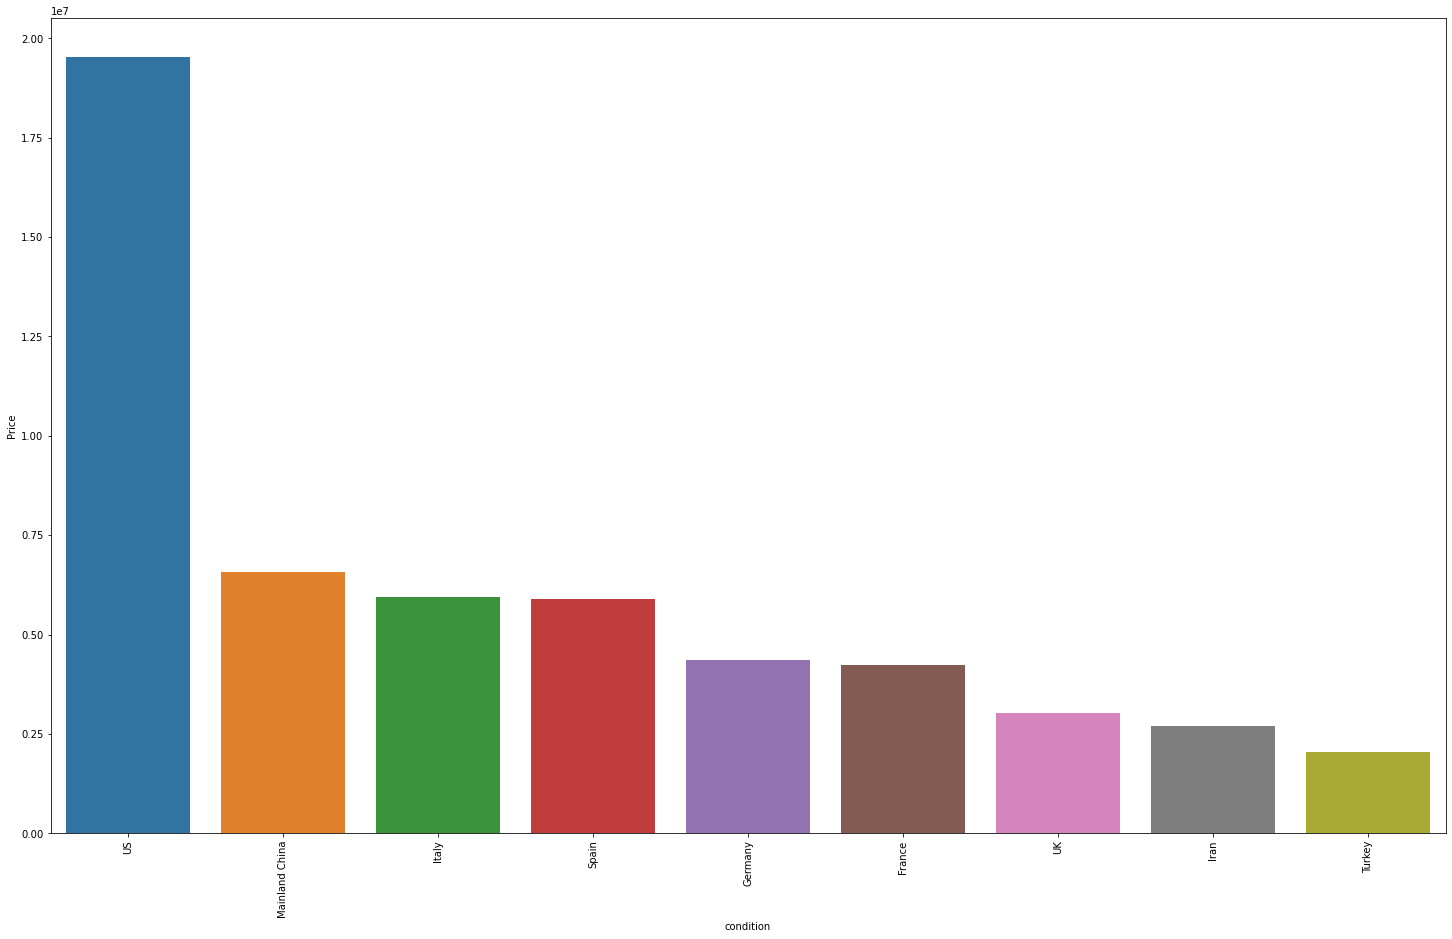

In [43]:
agg_data.sort_values(by=['Confirmed'], ascending=False, inplace=True)
vis_data = agg_data.head(25)

plt.figure(figsize=(25,15))
sns.barplot(x=vis_data['Country/Region'], y=vis_data.Confirmed,ci=None,)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Confirmed_cases_count')
plt.show()

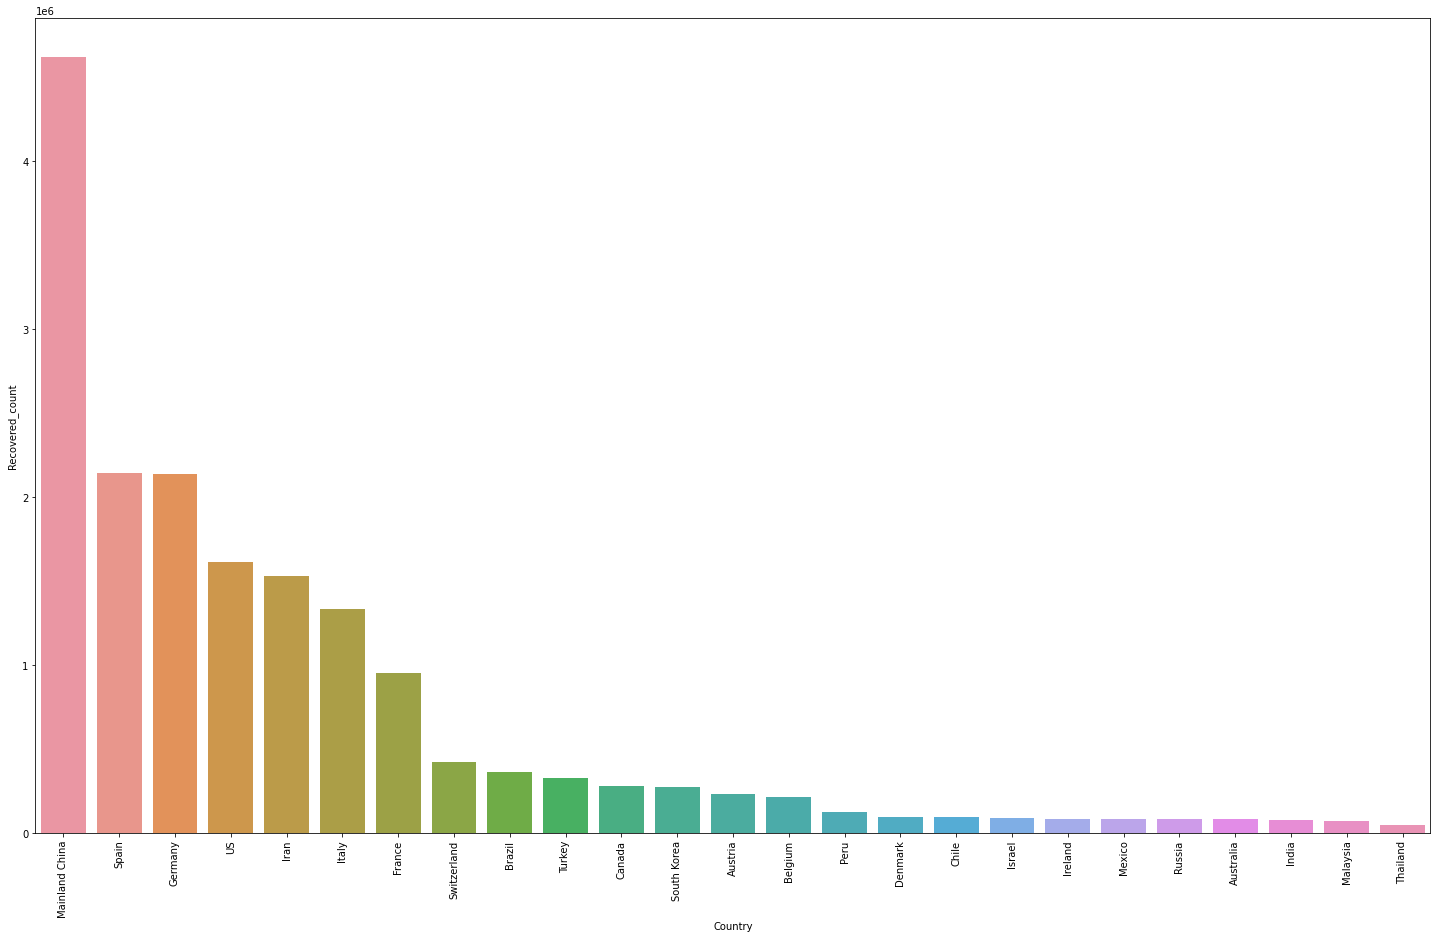

In [47]:
agg_data.sort_values(by=['Recovered'], ascending=False, inplace=True)
vis_data = agg_data.head(25)

plt.figure(figsize=(25,15))
sns.barplot(x=vis_data['Country/Region'], y=vis_data.Recovered,ci=None,)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Recovered_count')
plt.show()

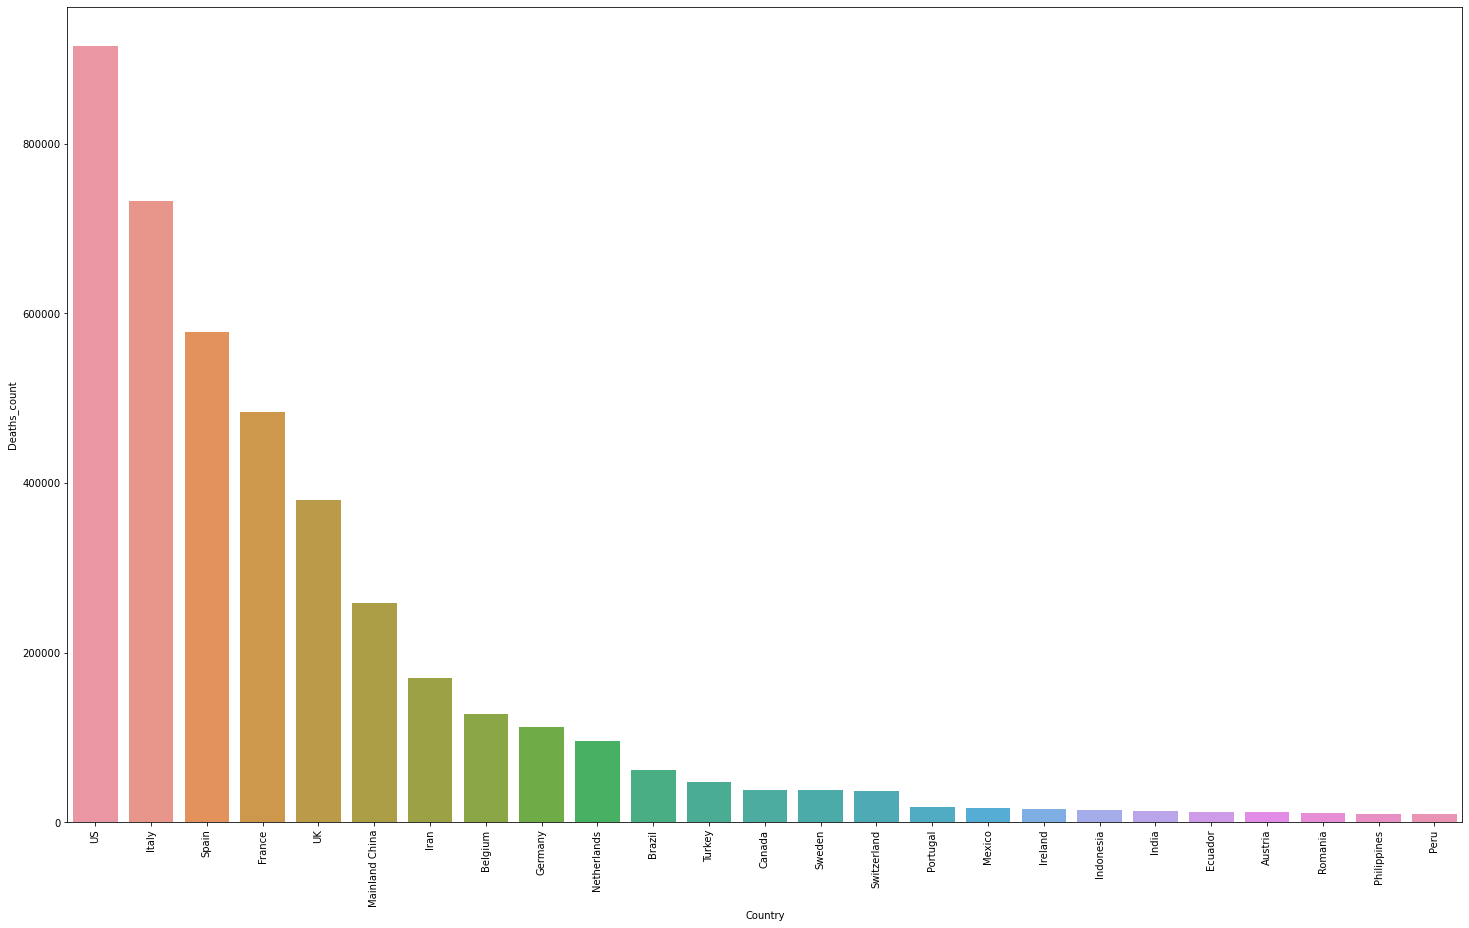

In [49]:
agg_data.sort_values(by=['Deaths'], ascending=False, inplace=True)
vis_data = agg_data.head(25)

plt.figure(figsize=(25,15))
sns.barplot(x=vis_data['Country/Region'], y=vis_data.Deaths,ci=None,)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Deaths_count')
plt.show()

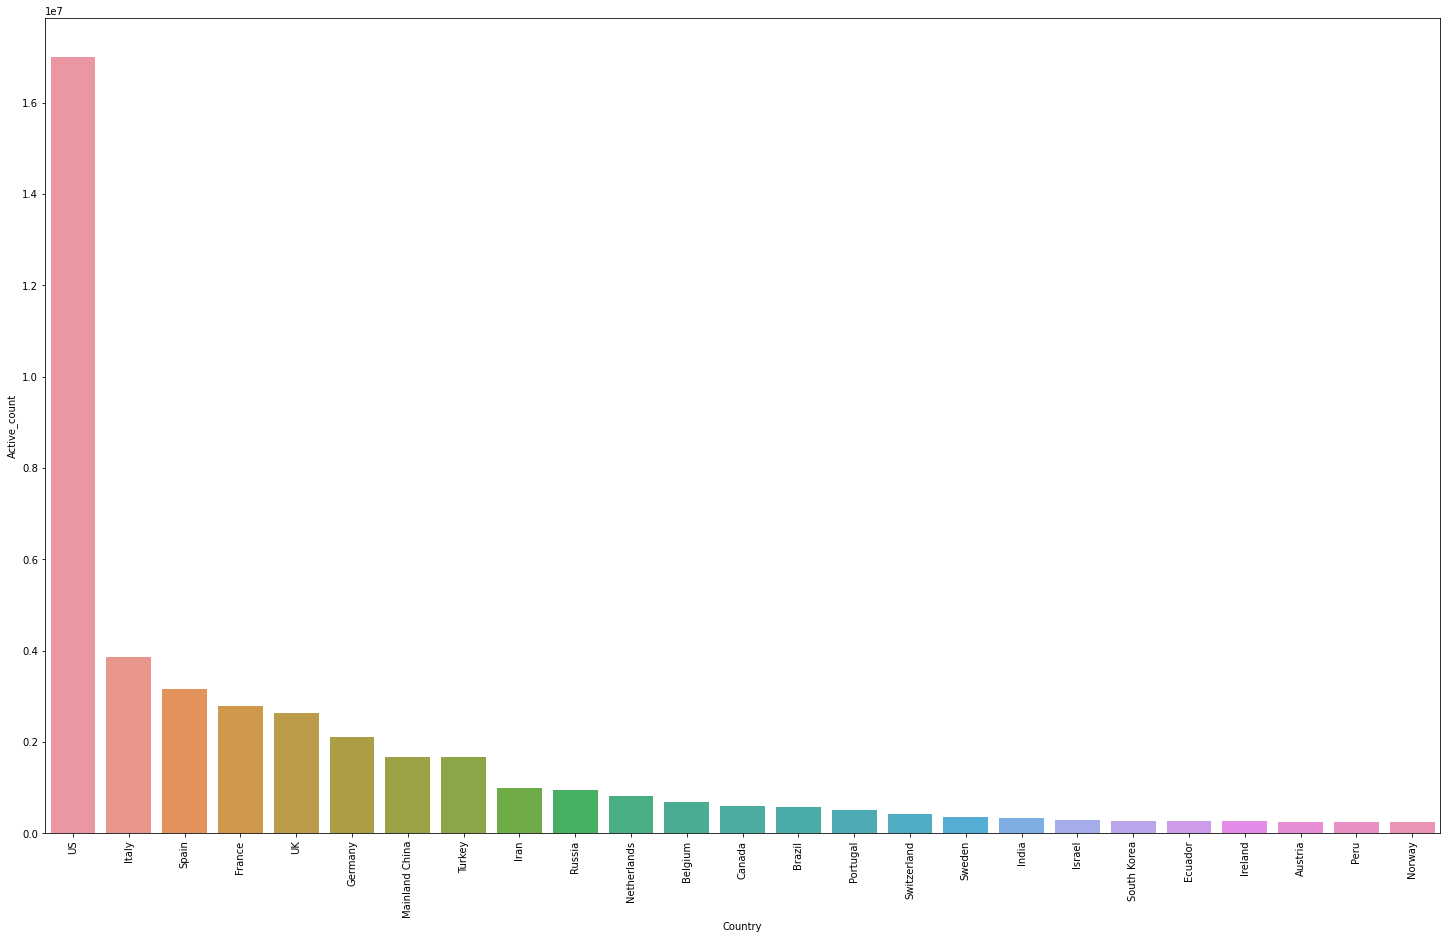

In [50]:
agg_data.sort_values(by=['Active_count'], ascending=False, inplace=True)
vis_data = agg_data.head(25)

plt.figure(figsize=(25,15))
sns.barplot(x=vis_data['Country/Region'], y=vis_data.Active_count,ci=None,)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Active_count')
plt.show()

In [100]:
date_wise_data = data.groupby(['ObservationDate']).sum().reset_index()

In [101]:
date_wise_data.drop(['SNo'], axis=1 , inplace=True)

In [102]:
date_wise_data.head(200)

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
...,...,...,...,...
94,04/25/2020,2896746.0,202846.0,816685.0
95,04/26/2020,2971475.0,206544.0,865733.0
96,04/27/2020,3041764.0,211167.0,893967.0
97,04/28/2020,3116398.0,217153.0,928658.0


/opt/anaconda3/envs/jupyter/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


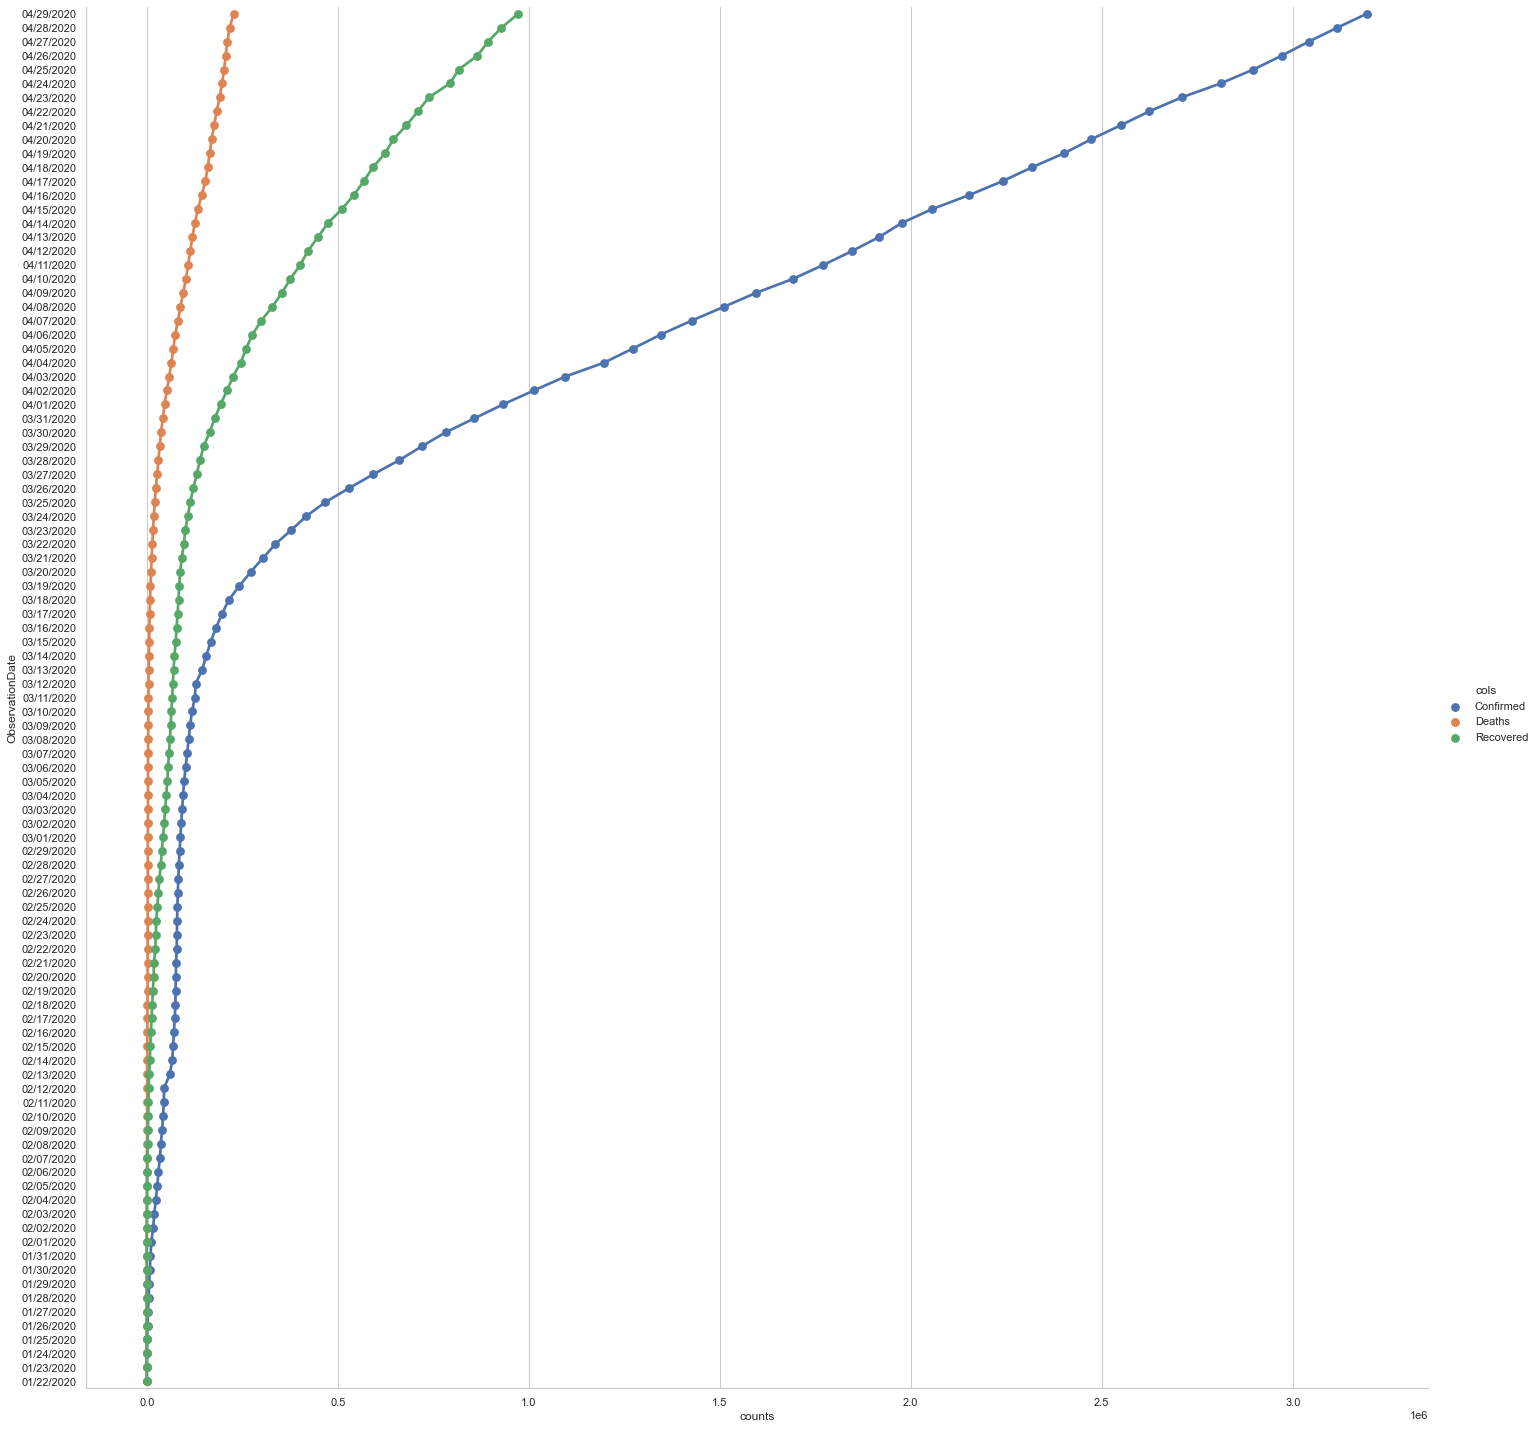

In [107]:
date_wise_data.sort_values(by=['ObservationDate'], ascending=False, inplace=True)
melted_data = date_wise_data.melt('ObservationDate', var_name='cols',  value_name='counts')
sns.factorplot(x='counts', y='ObservationDate', hue='cols', data=melted_data, height=20, aspect=1)

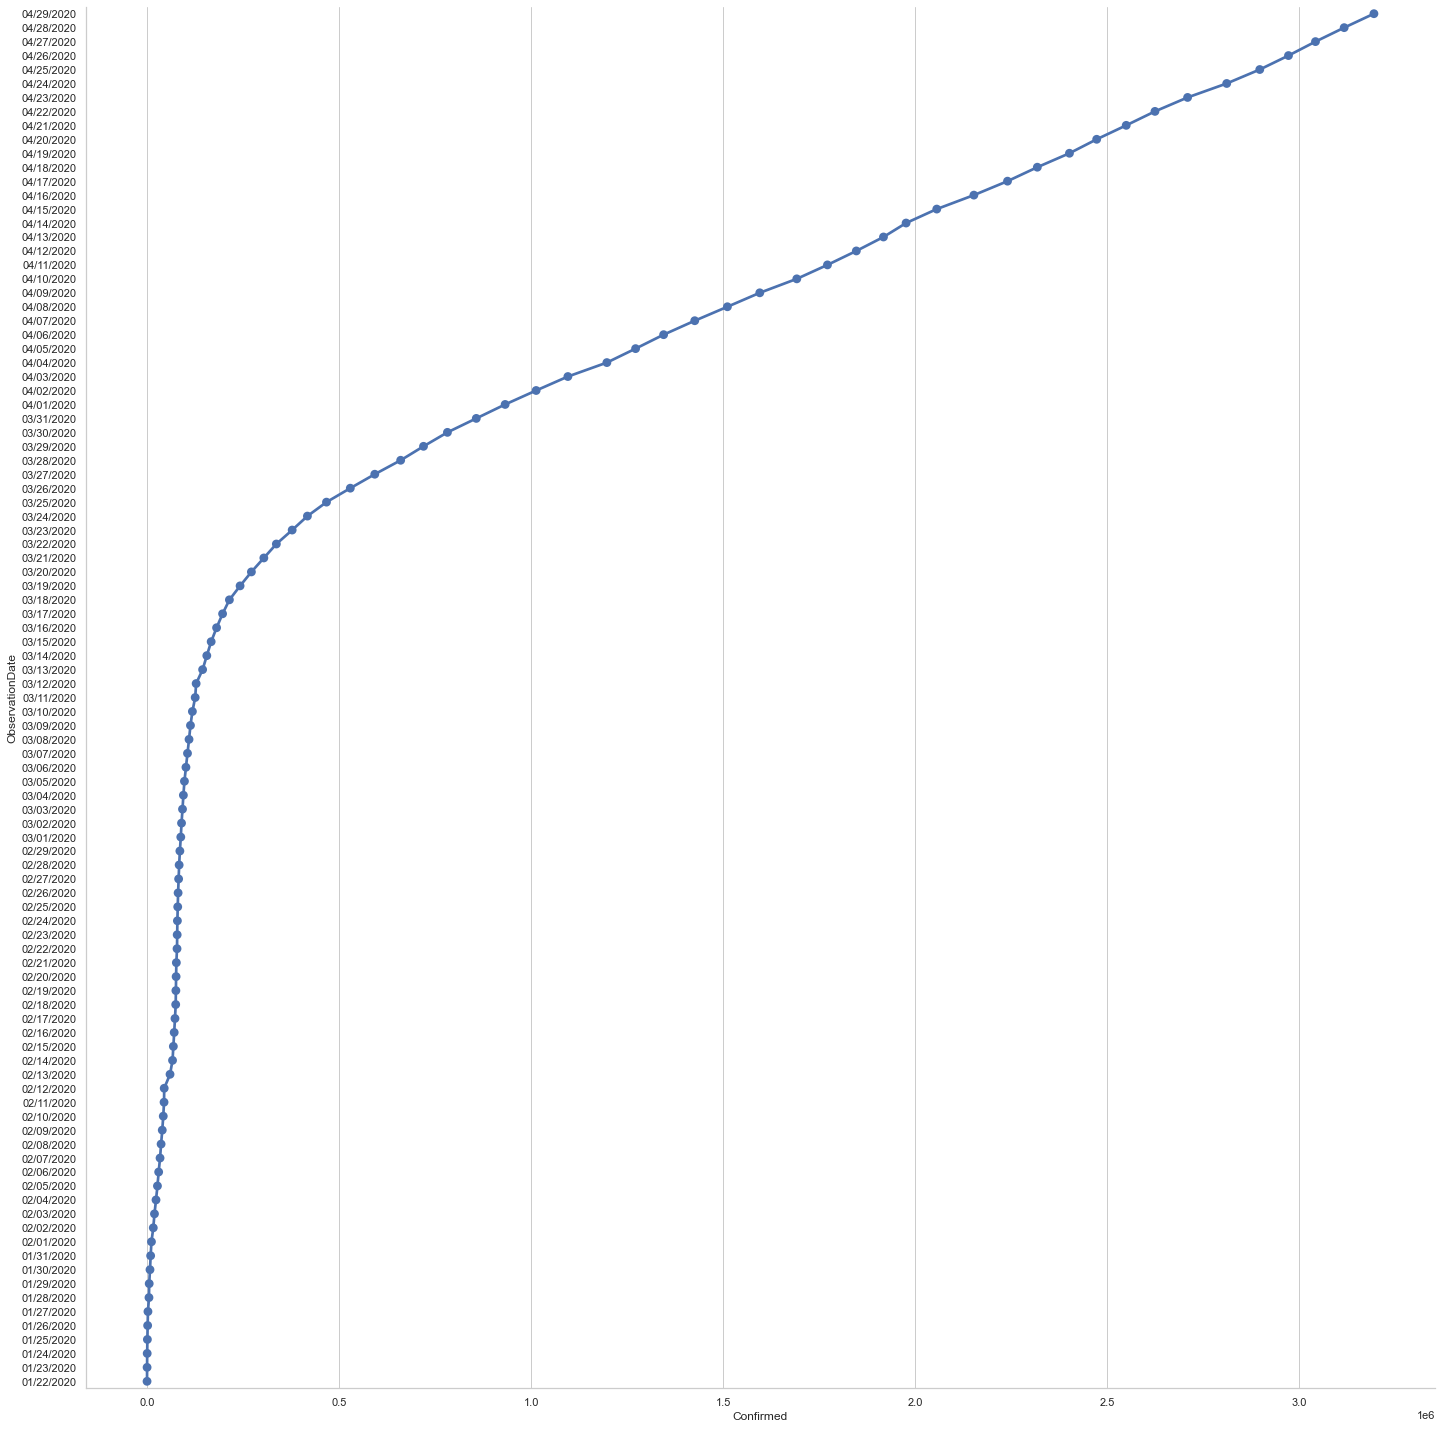

In [77]:
date_wise_data.sort_values(by=['ObservationDate'], ascending=False, inplace=True)
sns.set_theme(style="whitegrid")
sns.catplot(data=date_wise_data,x='Confirmed', y='ObservationDate', height=20, aspect=1, kind='point')
